In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('carprices.csv')

In [4]:
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [10]:
df=df.rename(columns={'Car Model':'car_model','Sell Price($)':'price','Age(yrs)':'age'})
df.head()

,car_model,Mileage,price,age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [24]:
df['car_model'].value_counts()

car_model
BMW X5                   5
Audi A5                  4
Mercedez Benz C class    4
Name: count, dtype: int64

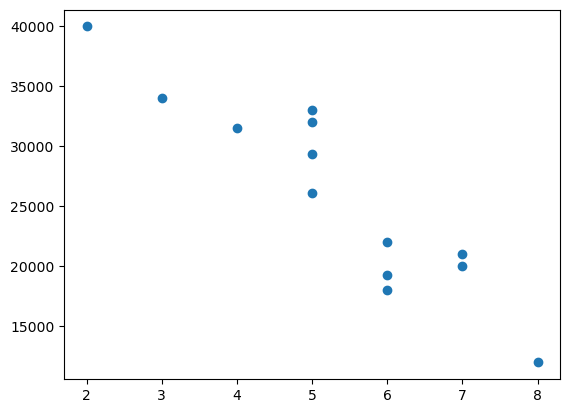

In [18]:
plt.scatter(x=df.age,y=df['price'])

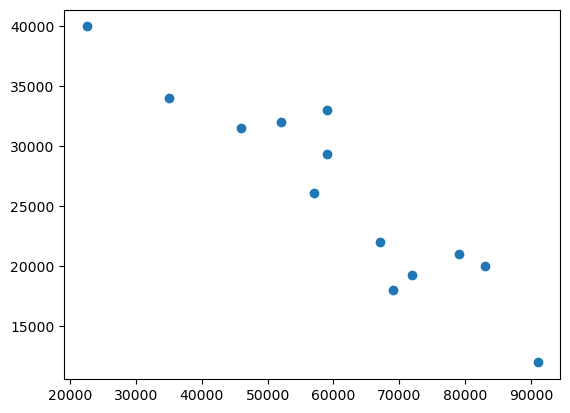

In [19]:
plt.scatter(x=df.Mileage,y=df['price'])

<BarContainer object of 13 artists>

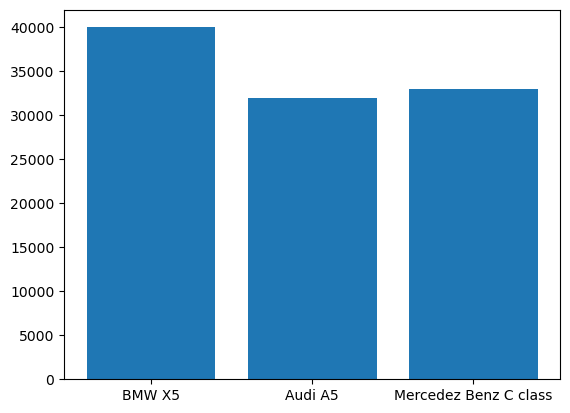

In [21]:
plt.bar(df.car_model,df.price)

In [29]:
dummies = pd.get_dummies(df.car_model)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [33]:
merged_df = pd.concat([df,dummies],axis=1)
merged_df.head()

,car_model,Mileage,price,age,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False
2,BMW X5,57000,26100,5,False,True,False
3,BMW X5,22500,40000,2,False,True,False
4,BMW X5,46000,31500,4,False,True,False


In [34]:
final_df = merged_df.drop(columns=['car_model','Mercedez Benz C class'])

In [35]:
final_df.head()

,Mileage,price,age,Audi A5,BMW X5
0,69000,18000,6,False,True
1,35000,34000,3,False,True
2,57000,26100,5,False,True
3,22500,40000,2,False,True
4,46000,31500,4,False,True


In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
X = final_df[['Mileage','age','Audi A5','BMW X5']]
y = final_df['price']

In [39]:
model = LinearRegression()

In [40]:
model.fit(X,y)

LinearRegression()

In [42]:
model.score(X,y)

0.9417050937281083

In [43]:
model.predict([[45000,4,0,0]])

C:\Users\shyam\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [44]:
model.predict([[86000,7,0,1]])

C:\Users\shyam\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])